In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.DataFrame(pd.read_csv("SpotifyFeatures.csv"))
data.dropna()
data.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

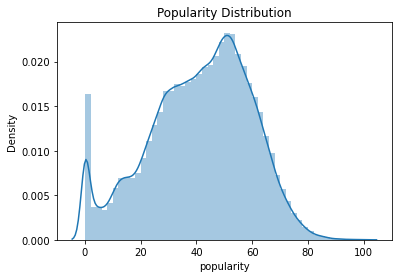

In [3]:
sns.distplot(data['popularity']).set_title('Popularity Distribution')

Text(0.5, 1.0, 'Popularity Based on Time Signature')

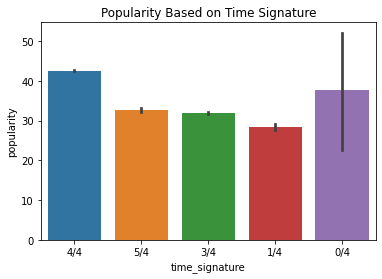

In [4]:
sns.barplot(x = 'time_signature', y = 'popularity', data = data)
plt.title('Popularity Based on Time Signature')

Text(0.5, 1.0, 'Popularity Based on Key')

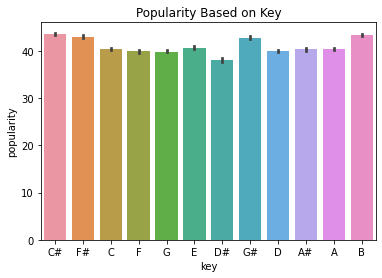

In [5]:
sns.barplot(x = 'key', y = 'popularity', data = data)
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on Mode')

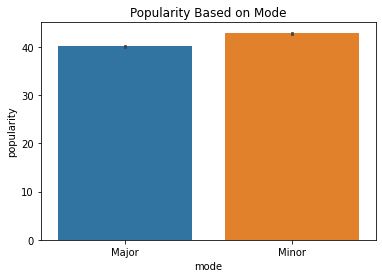

In [6]:
sns.barplot(x = 'mode', y = 'popularity', data = data)
plt.title('Popularity Based on Mode')

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

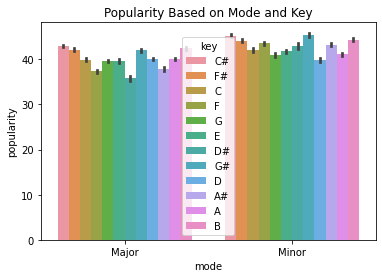

In [7]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = data)
plt.title('Popularity Based on Mode and Key')

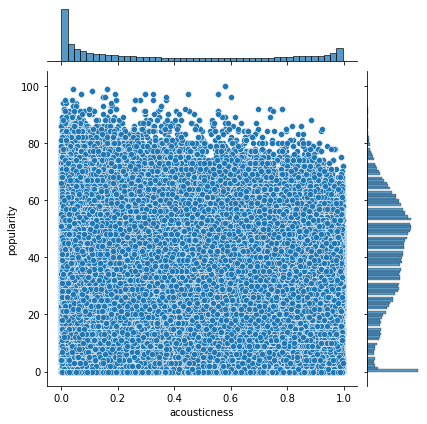

In [8]:
sns.jointplot(x = 'acousticness', y = 'popularity', data = data)

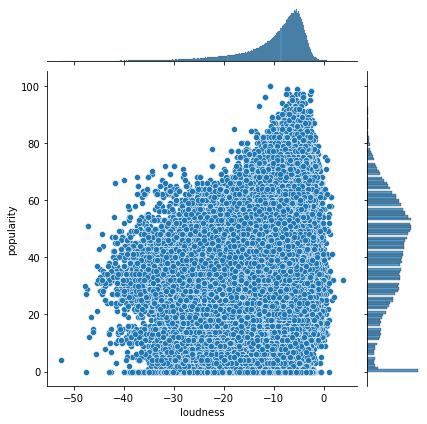

In [9]:
sns.jointplot(x = 'loudness', y = 'popularity', data = data)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Acoustiness for Songs with More than 50 Popularity')

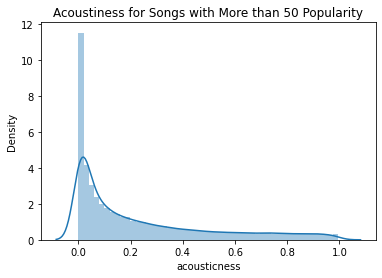

In [10]:
popular_above_50 = data[data.popularity > 50]
sns.distplot(popular_above_50['acousticness'])
plt.title('Acoustiness for Songs with More than 50 Popularity')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Acoustiness for Songs with Less than 50 Popularity')

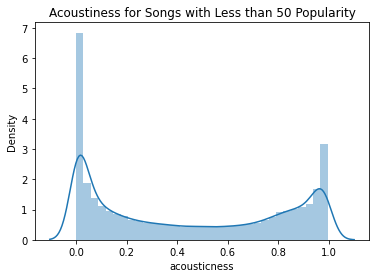

In [11]:
popular_below_50 = data[data.popularity < 50]
sns.distplot(popular_below_50['acousticness'])
plt.title('Acoustiness for Songs with Less than 50 Popularity')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Loudness for Songs with More than 50 Popularity')

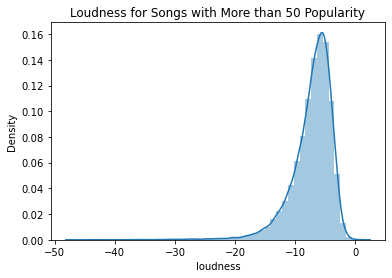

In [12]:
sns.distplot(popular_above_50['loudness'])
plt.title('Loudness for Songs with More than 50 Popularity')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Loudness for Songs with Less than 50 Popularity')

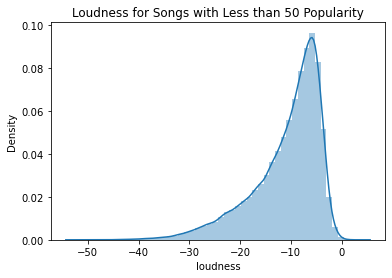

In [13]:
popular_below_50 = data[data.popularity < 50]
sns.distplot(popular_below_50['loudness'])
plt.title('Loudness for Songs with Less than 50 Popularity')

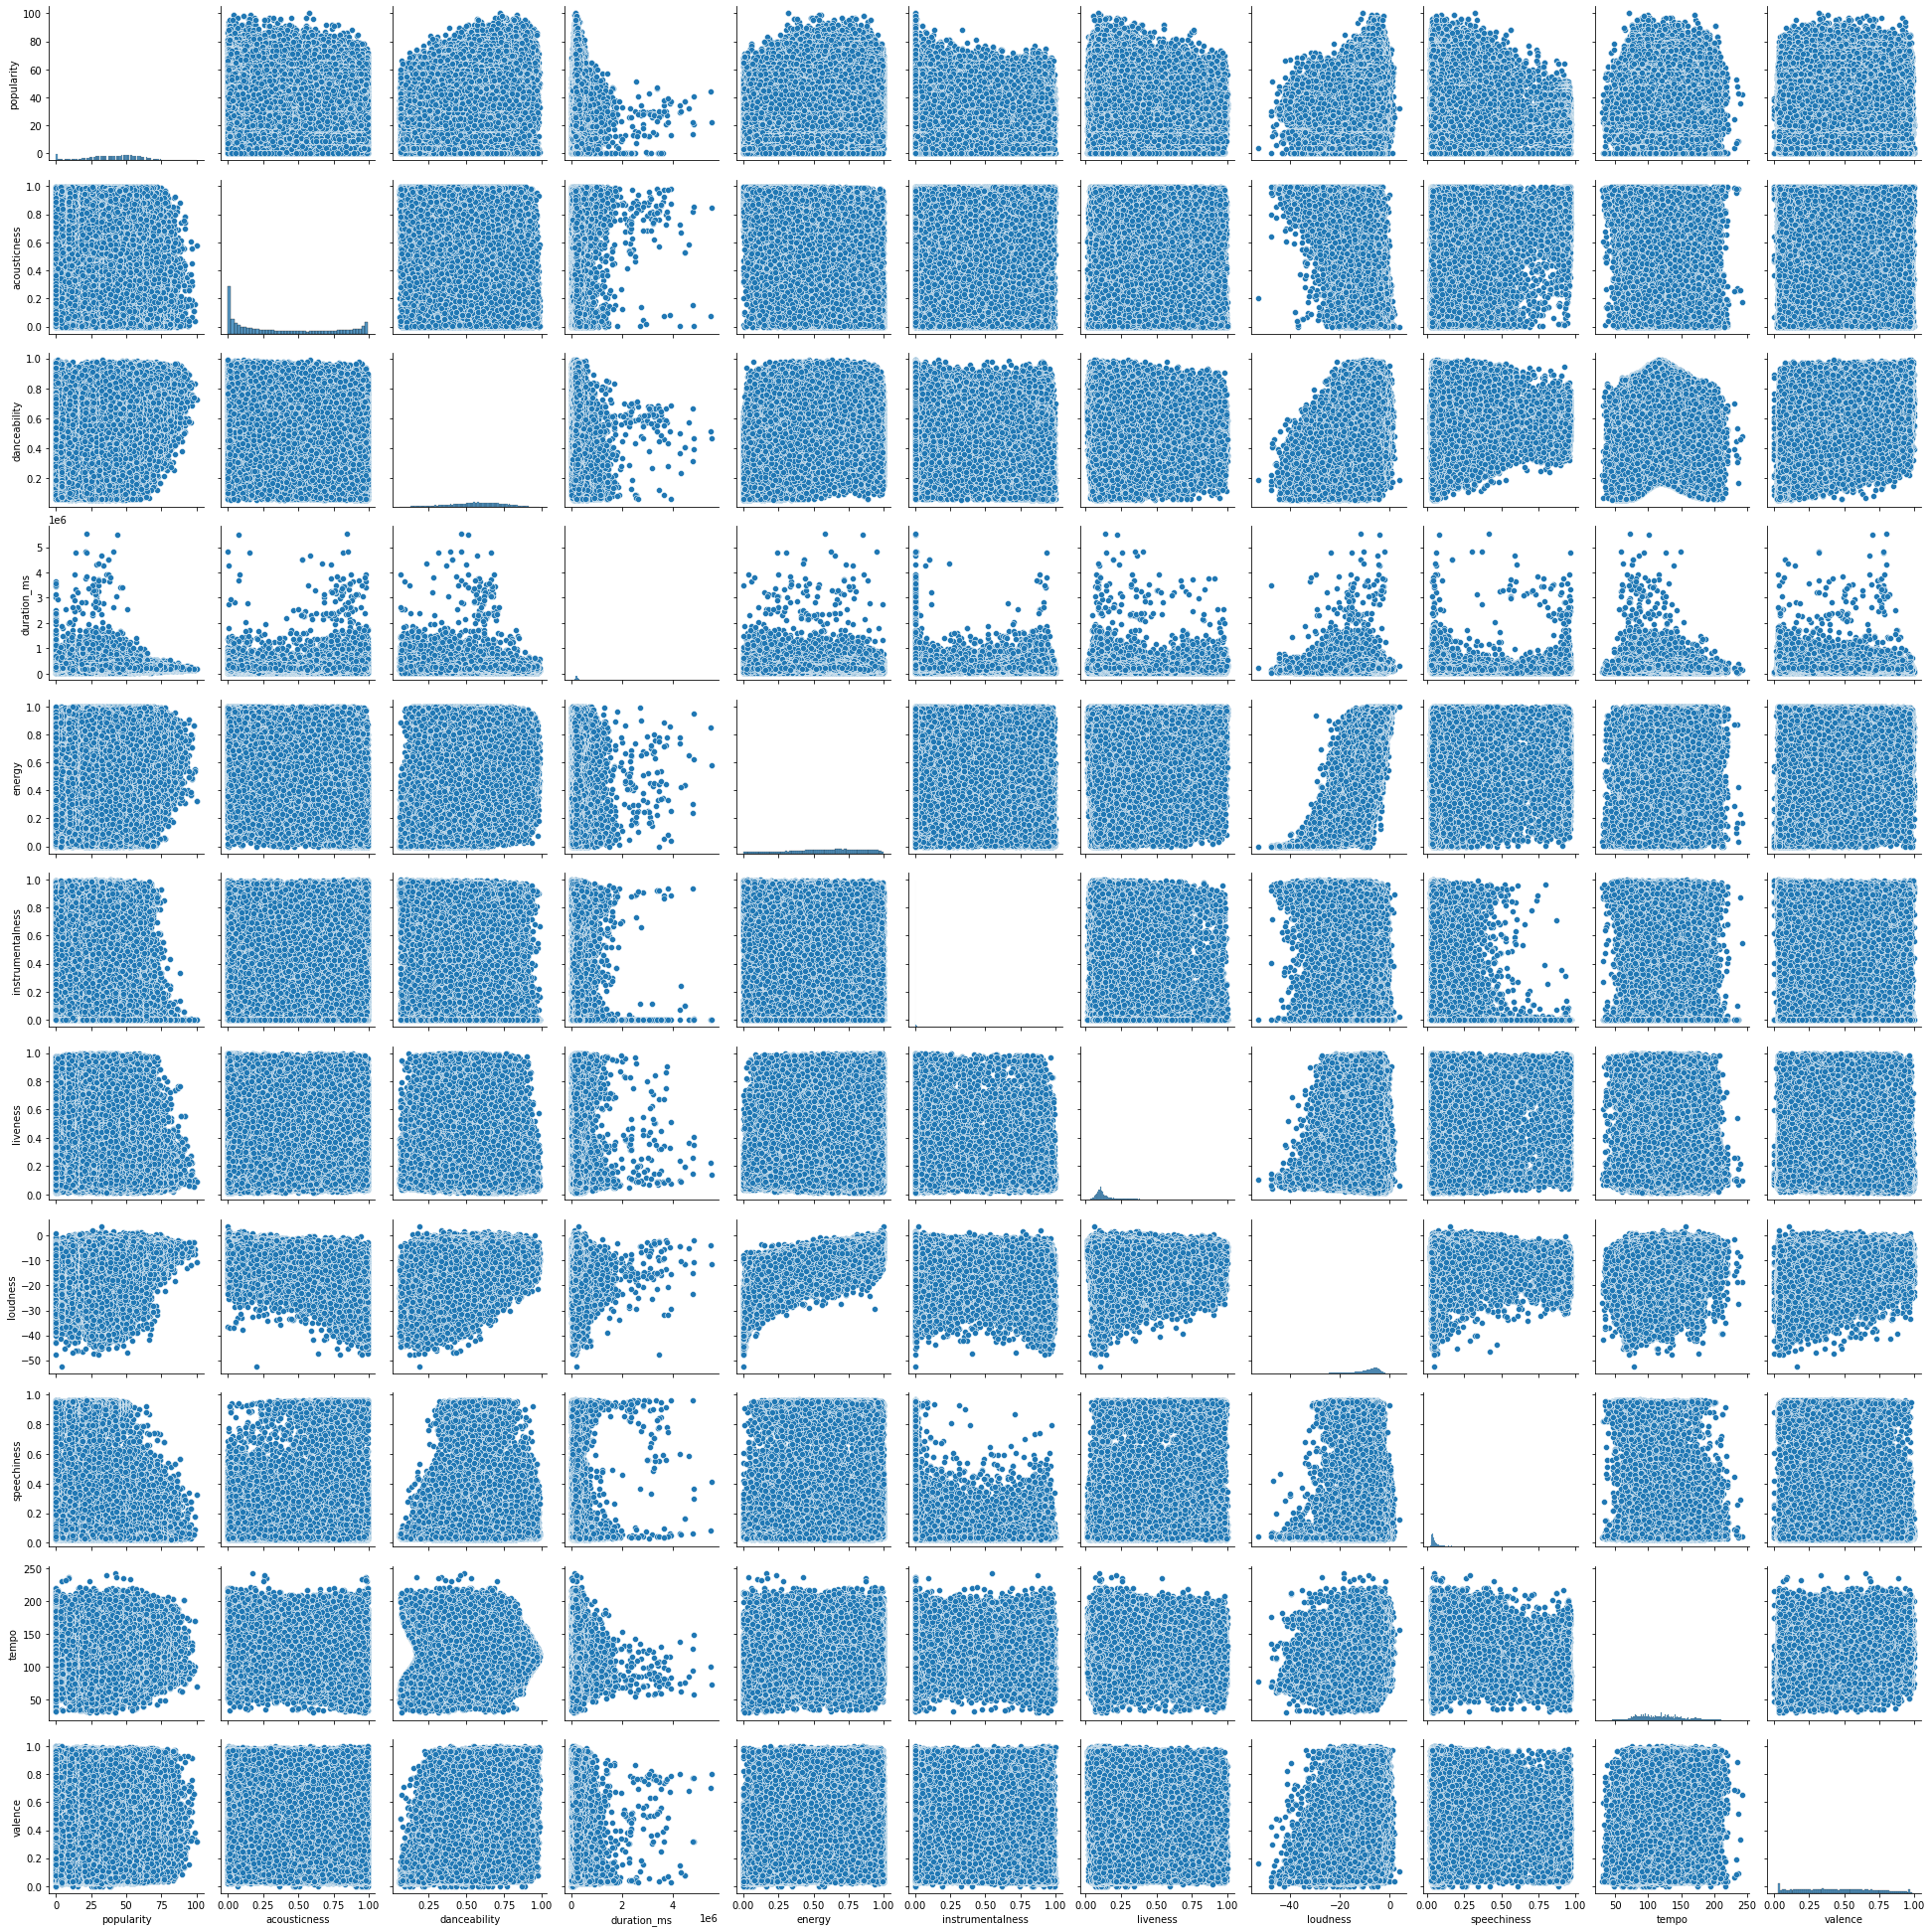

In [14]:
 sns.pairplot(data)

In [15]:
data = data.head(1000)

In [16]:
data1 = pd.get_dummies(data["genre"])
data = pd.concat([data, data1], axis = 1).reindex(data.index)
data.drop('genre', axis=1, inplace=True)
data.head()

artist_name                        track_name  \
0     Henri Salvador       C'est beau de faire un Show   
1  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2    Joseph Williams    Don't Let Me Be Lonely Tonight   
3     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  ...   mode  speechiness  \
0        99373   0.910             0.000  C#  ...  Major       0.0525   
1       137373   0.737             0.000  F#  ...  Minor       0.0868   
2       170267   0.131             0.000   C  ...  Minor       0.0362   
3       152427   0.326             0.000  C#  ...  Major       0.0395   
4        82625   0.225             0.123   F  ...  Major       0.0456   

     tempo  time_signature  valence A Capella  Alternative  Country  Movie  \
0  166.969             4/4    0.814         0            0        0      1   
1  174.003             4/4    0.816         0            0        0      1   
2   99.488             5/4    0.368         0            0        0      1   
3  171.758             4/4    0.227         0            0        0      1   
4  140.576             4/4    0.390         0            0        0      1   

   R&B  
0    0  
1    0  
2    0  
3    0  
4    0  

[5 rows x 22 columns]

In [17]:
data1 = pd.get_dummies(data["key"])
data = pd.concat([data, data1], axis = 1).reindex(data.index)
data.drop('key', axis=1, inplace=True)
data.head()

artist_name                        track_name  \
0     Henri Salvador       C'est beau de faire un Show   
1  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2    Joseph Williams    Don't Let Me Be Lonely Tonight   
3     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness  liveness  ...  B  C  C#  D D#  E  F  \
0        99373   0.910             0.000    0.3460  ...  0  0   1  0  0  0  0   
1       137373   0.737             0.000    0.1510  ...  0  0   0  0  0  0  0   
2       170267   0.131             0.000    0.1030  ...  0  1   0  0  0  0  0   
3       152427   0.326             0.000    0.0985  ...  0  0   1  0  0  0  0   
4        82625   0.225             0.123    0.2020  ...  0  0   0  0  0  0  1   

   F#  G  G#  
0   0  0   0  
1   1  0   0  
2   0  0   0  
3   0  0   0  
4   0  0   0  

[5 rows x 33 columns]

In [18]:
data1 = pd.get_dummies(data["mode"])
data = pd.concat([data, data1], axis = 1).reindex(data.index)
data.drop('mode', axis=1, inplace=True)
data.head()

artist_name                        track_name  \
0     Henri Salvador       C'est beau de faire un Show   
1  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2    Joseph Williams    Don't Let Me Be Lonely Tonight   
3     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness  liveness  ...  C#  D  D#  E  F  F#  \
0        99373   0.910             0.000    0.3460  ...   1  0   0  0  0   0   
1       137373   0.737             0.000    0.1510  ...   0  0   0  0  0   1   
2       170267   0.131             0.000    0.1030  ...   0  0   0  0  0   0   
3       152427   0.326             0.000    0.0985  ...   1  0   0  0  0   0   
4        82625   0.225             0.123    0.2020  ...   0  0   0  0  1   0   

   G  G#  Major  Minor  
0  0   0      1      0  
1  0   0      0      1  
2  0   0      0      1  
3  0   0      1      0  
4  0   0      1      0  

[5 rows x 34 columns]

In [19]:
data1 = pd.get_dummies(data["time_signature"])
data = pd.concat([data, data1], axis = 1).reindex(data.index)
data.drop('time_signature', axis=1, inplace=True)
data.head()

artist_name                        track_name  \
0     Henri Salvador       C'est beau de faire un Show   
1  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2    Joseph Williams    Don't Let Me Be Lonely Tonight   
3     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness  liveness  ...  F  F#  G  G#  Major  \
0        99373   0.910             0.000    0.3460  ...  0   0  0   0      1   
1       137373   0.737             0.000    0.1510  ...  0   1  0   0      0   
2       170267   0.131             0.000    0.1030  ...  0   0  0   0      0   
3       152427   0.326             0.000    0.0985  ...  0   0  0   0      1   
4        82625   0.225             0.123    0.2020  ...  1   0  0   0      1   

   Minor  1/4  3/4  4/4  5/4  
0      0    0    0    1    0  
1      1    0    0    1    0  
2      1    0    0    0    1  
3      0    0    0    1    0  
4      0    0    0    1    0  

[5 rows x 37 columns]

In [20]:
data.drop('artist_name', axis = 1, inplace=True)

In [21]:
data.drop('track_name', axis = 1, inplace=True)

In [22]:
data.drop('track_id', axis = 1, inplace=True)

In [23]:
np.random.seed(0)
df_train,df_test= train_test_split(data,train_size = 0.8,test_size= 0.2,random_state=100)

In [24]:
y_train=df_train.pop('popularity')
X_train=df_train
y_test=df_test.pop('popularity')
X_test=df_test

In [25]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [26]:
lm.coef_

array([ 7.40126163e-01,  1.30007378e+00, -2.14275764e-07, -1.95483368e+00,
       -5.26227282e-01,  1.70343480e-01,  1.14003642e-01, -2.08788736e+00,
       -4.41670339e-03,  6.18999122e-01, -2.94586692e+01,  3.67560672e+01,
        4.60286803e+00, -3.72296356e+01,  2.53293696e+01, -2.27947243e-02,
       -2.88172489e-02,  4.97159595e-01, -1.52944018e-01, -1.34047710e-01,
        2.21431176e-01,  7.37559156e-02, -2.26675479e-01,  3.32415368e-02,
        5.03695079e-01, -6.18684879e-01, -1.45319244e-01,  2.01769398e-02,
       -2.01769398e-02, -5.45723282e-03,  3.25373936e-01,  7.32394425e-02,
       -3.93156145e-01])

In [27]:
lm.intercept_

40.018322077525184

In [28]:
ypredict=lm.predict((X_test))

In [29]:
ypredict

array([ 6.33935893e+01,  7.17977893e-01,  1.44188927e+00,  1.12557886e+00,
        9.89541469e+00,  1.47573398e+00,  1.27203036e+00,  9.47522757e+00,
        4.25244308e+01,  4.32007935e+01,  9.63006418e+00,  4.24460622e+01,
        6.34495127e+01,  7.59400444e+01,  4.37954504e+01, -1.23988594e+00,
        1.38210353e+00,  4.38108788e+01,  1.80095873e+00,  9.35044633e+00,
        4.18337074e+01,  6.43553501e+01,  4.28529524e+01,  2.35692339e-02,
        1.55093939e+00,  9.21880408e+00,  4.36525531e+01,  2.16295074e+00,
        9.38842507e+00,  4.34584982e+01,  4.37133638e+01,  6.39418036e+01,
        6.32055937e+01,  6.47302309e+01,  1.91801652e+00,  4.29699163e+01,
        4.31425021e+01,  4.33563263e+01,  6.30458476e+01,  1.86995990e+00,
        6.42435054e+01,  6.39718514e+01,  6.39391540e+01,  1.75374145e+00,
        4.31092175e+01,  6.43315820e+01,  9.15324945e+00,  1.20427338e+00,
        4.28519727e+01,  2.26469063e+00,  6.37199705e+01,  4.28355685e+01,
        6.04457343e-01,  

In [30]:
lm.score(X_test,y_test)

0.9644019284108953